<a href="https://colab.research.google.com/github/lawrencegomez233/machine-learning-python-project/blob/main/wellgame2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import csv

In [ ]:
response = requests.get("http://10.68.195.110:8000/well/start/4")
print(response)
print(response.json())
data = response.json()

KeyboardInterrupt: 

In [ ]:
count = 0
failures = []

# name
csv_file = 'data_well.csv'

# Define the CSV headers
headers = ['Bit_Temperature', 'Casing Integrity', 'Cuttings', 'Depth_Temperature',
           'Depth_of_Bit', 'MUD_Circulation', 'MUD_Density', 'MUD_Density_Rating',
           'Permeability', 'Permeability_Rating', 'Porosity', 'Precipitation',
           'Pressure', 'Rotary_Speed', 'Rotary_Torque', 'Weight_on_Bit',
           'failure', 'score', 'sessionID', 'team', 'turn']


with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=headers)
    writer.writeheader()  # Write the headers

    #initial request
    response = requests.get("http://10.68.195.110:8000/well/drill/fLfFdp5uDq96p3FJyrGazq5_-vs")
    data = response.json()
    print(data)

    last = data

    # Loop to collect data and write to CSV

    while count <= 150:
        try:
        # Extract the conditions and add them to the row data
            conditions = data.get('conditions', {})
            row_data = {**conditions, 'failure': data.get('failure', False),
                        'score': data.get('score', None),
                        'sessionID': data.get('sessionID', None),
                        'team': data.get('team', None),
                        'turn': data.get('turn', None)}

            # Write the row data to the CSV file
            writer.writerow(row_data)

            if data['failure']:
                # API call to repair if failure is True
                response = requests.get("http://10.68.195.110:8000/well/repair/fLfFdp5uDq96p3FJyrGazq5_-vs")
                data = response.json()
                # print("FAILURE!!!!!!!!!")
                print(data)
            else:
                # API call to drill if failure is False
                response = requests.get("http://10.68.195.110:8000/well/drill/fLfFdp5uDq96p3FJyrGazq5_-vs")
                data = response.json()
                print(data)
                last = data

            count += 1

        except Exception as E:
            response = requests.get("http://10.68.195.110:8000/well/current/fLfFdp5uDq96p3FJyrGazq5_-vs")
            continue

{'conditions': {'Bit_Temperature': 279.0, 'Casing Integrity': 'Good', 'Cuttings': 64, 'Depth_Temperature': 95.73414811446314, 'Depth_of_Bit': 25, 'MUD_Circulation': 585.0025372205057, 'MUD_Density': 11, 'MUD_Density_Rating': 'Good', 'Permeability': 3, 'Permeability_Rating': 'Bad', 'Porosity': 4, 'Precipitation': 'High', 'Pressure': 15.5, 'Rotary_Speed': 135.19828650893368, 'Rotary_Torque': 4115.0, 'Weight_on_Bit': 4385.727822445551}, 'failure': False, 'score': 1, 'sessionID': 'fLfFdp5uDq96p3FJyrGazq5_-vs', 'team': 4, 'turn': 1}
{'conditions': {'Bit_Temperature': 125.0, 'Casing Integrity': 'Good', 'Cuttings': 85, 'Depth_Temperature': 99.68857213268123, 'Depth_of_Bit': 50, 'MUD_Circulation': 990.8236891005415, 'MUD_Density': 11, 'MUD_Density_Rating': 'Good', 'Permeability': 9, 'Permeability_Rating': 'Good', 'Porosity': 1, 'Precipitation': 'Fair', 'Pressure': 24.1, 'Rotary_Speed': 148.36914045641447, 'Rotary_Torque': 1355.0, 'Weight_on_Bit': 1651.5573383267274}, 'failure': False, 'score':

     Bit_Temperature  Casing Integrity  Cuttings  Depth_Temperature  \
0              279.0                 2        64          95.734148   
1              125.0                 2        85          99.688572   
2              294.0                 2        14          94.321253   
3              397.0                 1        28          81.121856   
4              133.0                 2        86          85.592988   
..               ...               ...       ...                ...   
146            219.0                 2        43          75.813414   
147            316.0                 2        84          79.563224   
148            248.0                 2        76          80.017964   
149            156.0                 2        15          93.385188   
150            100.0                 2        61          88.103396   

     Depth_of_Bit  MUD_Circulation  MUD_Density  MUD_Density_Rating  \
0              25       585.002537           11                   1   
1    

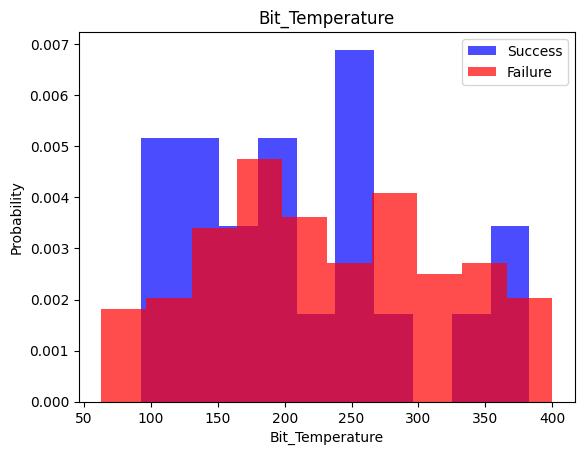

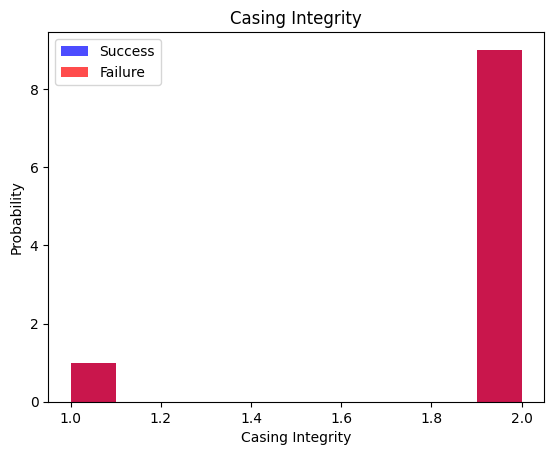

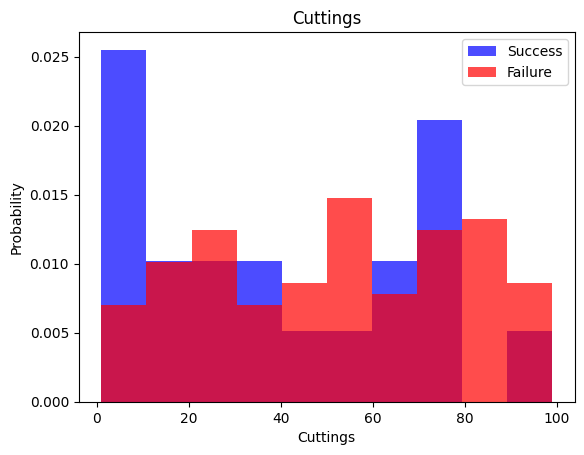

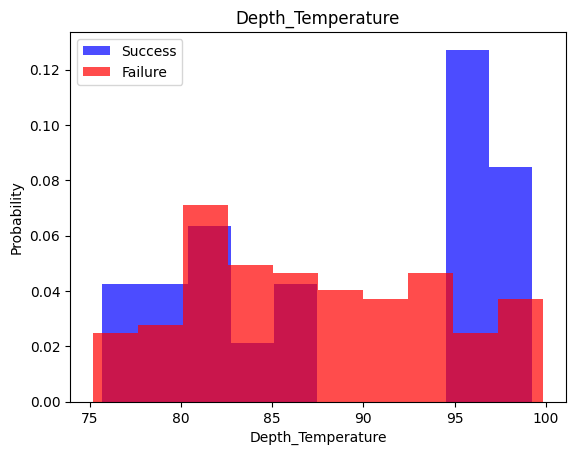

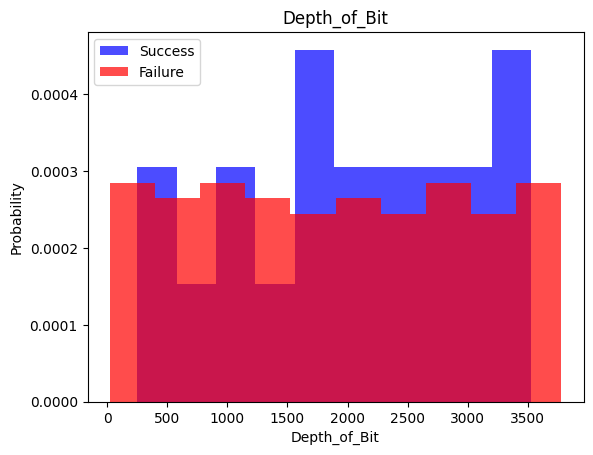

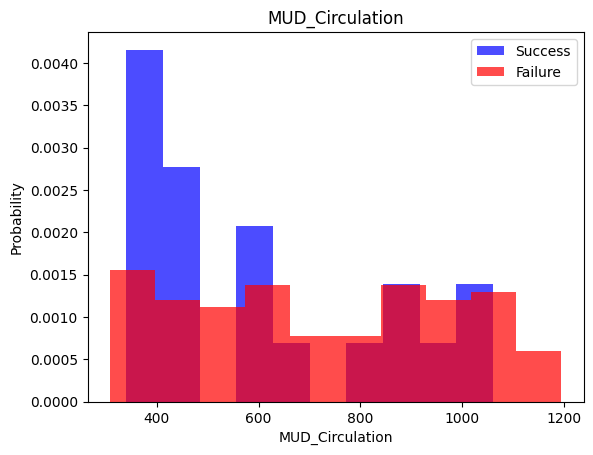

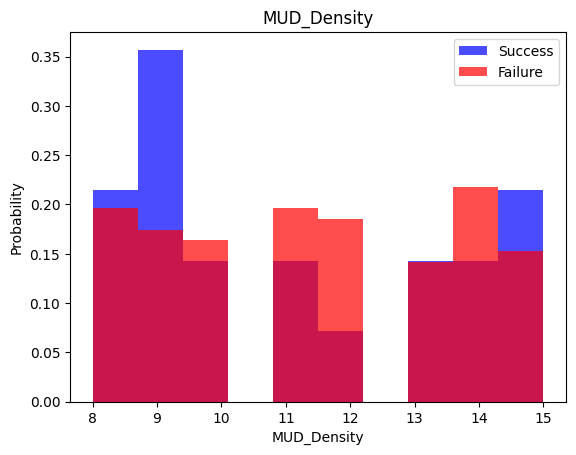

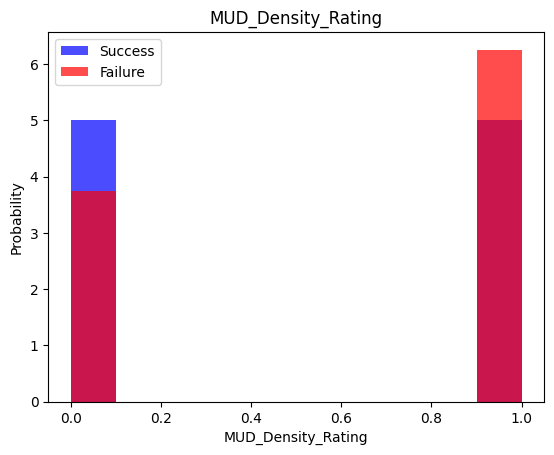

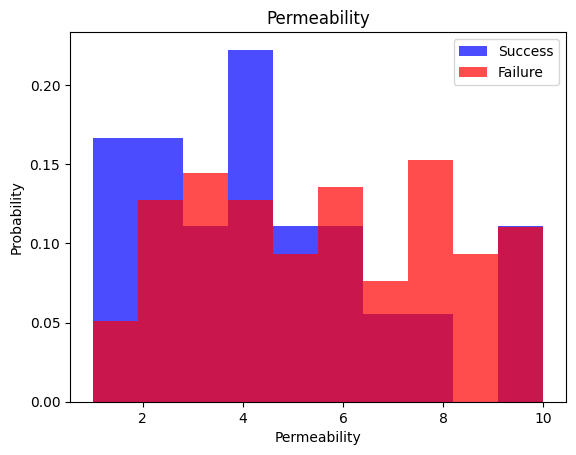

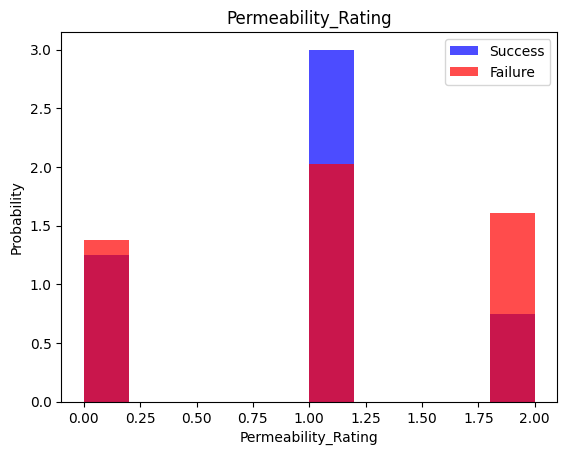

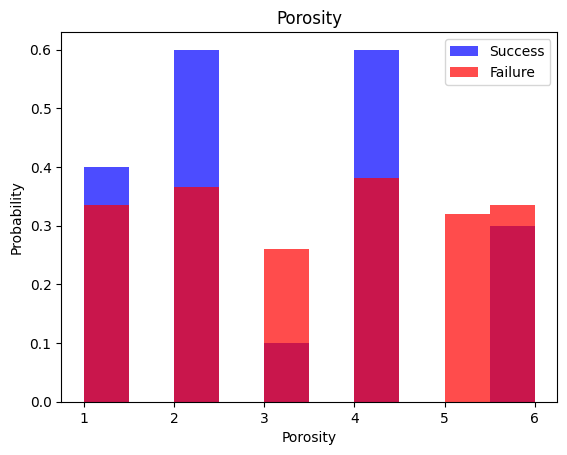

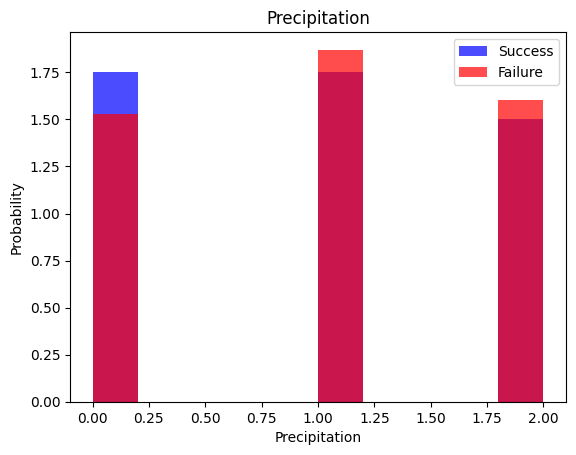

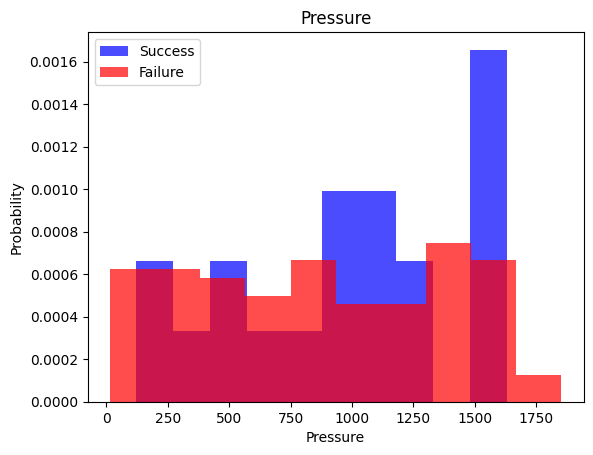

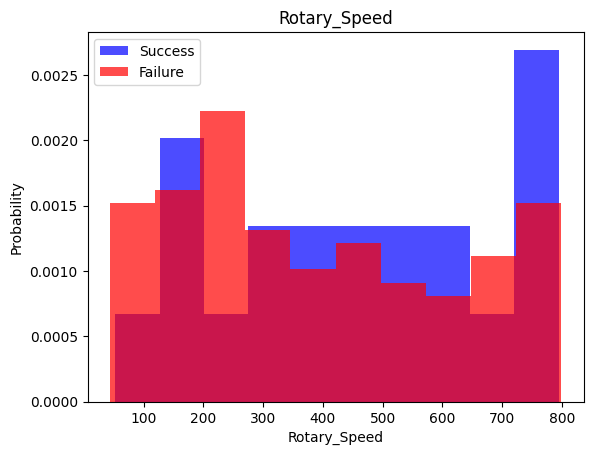

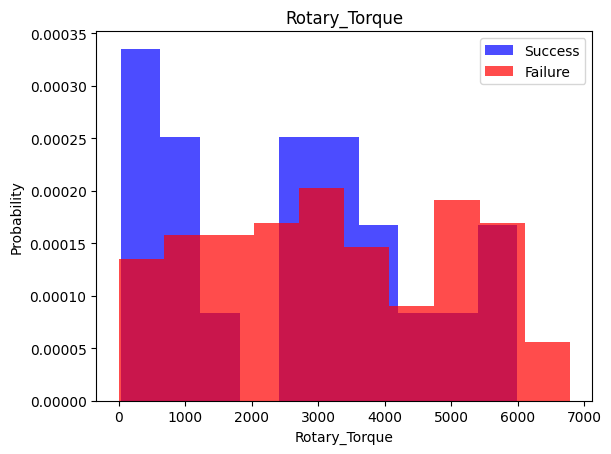

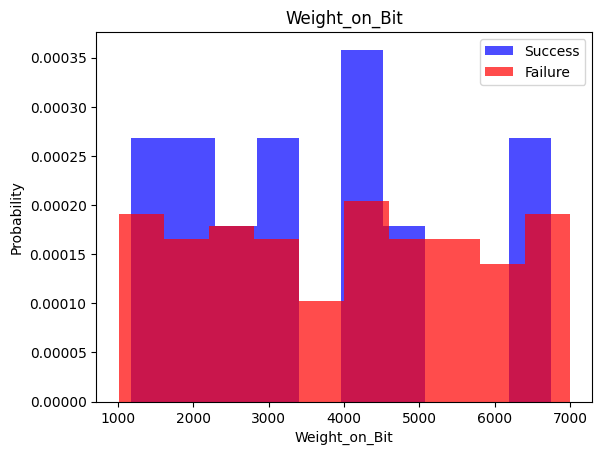

In [ ]:
df = pd.read_csv("data_well.csv")

df['failure'] = (df['failure']).astype(int)
df['MUD_Density_Rating'] = (df['MUD_Density_Rating']=="Good").astype(int)
ci_mapping = {"Good": 2, "Fair": 1, "Bad": 0}
p_mapping = {"High": 2, "Fair": 1, "Low": 0}
pr_mapping = {"Good": 2, "Bad": 1, "Fine": 0}
df['Casing Integrity'] = df['Casing Integrity'].map(ci_mapping)
df['Precipitation'] = df['Precipitation'].map(p_mapping)
df['Permeability_Rating'] = df['Permeability_Rating'].map(pr_mapping)
print(df)
cols = ["Bit_Temperature","Casing Integrity","Cuttings","Depth_Temperature","Depth_of_Bit","MUD_Circulation","MUD_Density","MUD_Density_Rating","Permeability","Permeability_Rating","Porosity","Precipitation","Pressure","Rotary_Speed","Rotary_Torque","Weight_on_Bit","failure","score","sessionID","team","turn"]

count = 0
for label in cols[:16]:
    plt.hist(df[df["failure"]==1][label], color='blue', label='Success', alpha=0.7, density=True)
    plt.hist(df[df["failure"]==0][label], color='red', label='Failure', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\User052\AppData\Roaming\Python\Python311\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
    X = df.drop(['failure', 'sessionID', 'score', 'team', 'turn'], axis=1)  # Exclude non-feature columns
    y = df['failure']

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = np.reshape(y.values, (-1, 1))

    data = np.hstack((X, y))

    return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        20

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



C:\Users\User052\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


nb

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72       131
           1       0.22      0.75      0.34        20

    accuracy                           0.61       151
   macro avg       0.58      0.67      0.53       151
weighted avg       0.84      0.61      0.67       151



C:\Users\User052\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


log reg

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.55      0.70       131
           1       0.21      0.80      0.34        20

    accuracy                           0.58       151
   macro avg       0.58      0.67      0.52       151
weighted avg       0.85      0.58      0.65       151



C:\Users\User052\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       131
           1       0.50      1.00      0.67        20

    accuracy                           0.87       151
   macro avg       0.75      0.92      0.79       151
weighted avg       0.93      0.87      0.88       151



C:\Users\User052\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


neural network

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import tensorflow as tf

X_train = np.random.rand(262, 16)  # 262 samples, 16 features
y_train = np.random.randint(0, 2, size=(262, 1))  # Binary labels with shape (262, 1)

# Reshape y_train to be a 1D array
y_train = y_train.ravel()
print(type(X_train), type(y_train))
print(tf.__version__)


nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

print(tf.__version__)



<class 'numpy.ndarray'> <class 'numpy.ndarray'>
2.17.0


ValueError: object __array__ method not producing an array